<a href="https://colab.research.google.com/github/Sagu12/all-projects/blob/master/PANDAS_GROUPBY_RAINFALL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df= pd.read_csv("/content/Dynamic_2017_2_0.csv")

In [0]:
df= df.fillna(df.mean())

In [25]:
df.head(30)

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.230000,46136.120000,1013.970000,50415.310000,186765.620000,9338.310000,177427.310000,142953.850000,14884.94,157838.790000,21623.750000,59410.090000,88.960000
1,2,ANDHRA PRADESH,Chittoor,115718.550000,32389.600000,1204.190000,38028.600000,187340.940000,9367.060000,177973.880000,95256.500000,9597.29,104853.790000,13528.830000,80858.360000,58.920000
2,3,ANDHRA PRADESH,East Godavari,104140.050000,95383.560000,3714.550000,50847.530000,254085.690000,12704.330000,241381.360000,41688.320000,9418.15,51106.470000,4226.850000,193656.030000,21.170000
3,4,ANDHRA PRADESH,Guntur,52942.860000,57011.900000,2547.960000,18800.390000,131303.100000,6565.150000,124737.950000,39174.720000,8942.35,48117.070000,14159.100000,79051.910000,38.570000
4,5,ANDHRA PRADESH,Kadapa,93311.680000,15869.520000,2048.530000,11177.610000,122407.340000,6120.400000,116286.940000,74888.060000,4974.42,79862.470000,6110.250000,56568.630000,68.680000
5,6,ANDHRA PRADESH,Krishna,52891.680000,70806.390000,21641.600000,17375.910000,162715.570000,8135.800000,154579.780000,47223.030000,9772.80,56995.830000,7402.780000,98790.070000,36.870000
6,7,ANDHRA PRADESH,Kurnool,90024.090000,43892.800000,1203.460000,26774.230000,161894.570000,8094.750000,153799.810000,53291.480000,11008.68,64300.170000,16377.900000,94278.990000,41.810000
7,8,ANDHRA PRADESH,Nellore,128089.980000,46637.760000,5.160000,93668.830000,268401.730000,13420.140000,254981.590000,90301.920000,6408.13,96710.050000,11024.360000,159531.340000,37.930000
8,9,ANDHRA PRADESH,Prakasam,39372.560000,26669.850000,56344.850000,36593.000000,158980.260000,7949.050000,151031.210000,54372.390000,10257.26,64629.640000,17557.060000,94941.540000,42.790000
9,10,ANDHRA PRADESH,Srikakulam,34847.680000,35719.340000,17837.370000,19681.530000,108085.910000,5404.340000,102681.560000,40762.370000,8747.99,49510.360000,17007.280000,63919.930000,48.220000


In [27]:
df.isna().sum()

S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            0
Recharge from other sources During Monsoon Season                       0
Recharge from rainfall During Non Monsoon Season                        0
Recharge from other sources During Non Monsoon Season                   0
Total Annual Ground Water Recharge                                      0
Total Natural Discharges                                                0
Annual Extractable Ground Water Resource                                0
Current Annual Ground Water Extraction For Irrigation                   0
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            0
Annual GW Allocation for Domestic Use 

In [32]:
g= df.groupby("Name of State")
g

In [107]:
#this is the iterator that groupby function provides
for state, state_df in g:
  print(state)
  print(state_df)

A&N ISLAND
     S.no.  ... Stage of Ground Water Extraction (%)
670    671  ...                                 3.52
671    672  ...                                 0.66
672    673  ...                                 6.27

[3 rows x 16 columns]
ANDHRA PRADESH
    S.no.  ... Stage of Ground Water Extraction (%)
0       1  ...                                88.96
1       2  ...                                58.92
2       3  ...                                21.17
3       4  ...                                38.57
4       5  ...                                68.68
5       6  ...                                36.87
6       7  ...                                41.81
7       8  ...                                37.93
8       9  ...                                42.79
9      10  ...                                48.22
10     11  ...                                24.59
11     12  ...                                21.07
12     13  ...                                41.40

[13 rows x

In [110]:
g.get_group("ASSAM")

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
29,30,ASSAM,Baksa,92583.69,1652.06,28843.21,1256.04,124335.00,17309.64,107025.37,2548.56,2558.80,5107.36,2970.09,101465.32,4.77
30,31,ASSAM,Barpeta,110295.03,2216.29,26788.85,7861.30,147161.47,8293.48,138867.99,24276.00,4407.40,28683.40,5158.32,109421.07,20.66
31,32,ASSAM,Bongaigaon,43080.26,1088.59,14971.04,3252.26,62392.15,3807.16,58584.99,10024.56,1996.55,12021.11,2286.71,46236.65,20.52
32,33,ASSAM,Cachar,57788.78,1223.79,36771.75,1418.09,97202.41,40846.83,56355.58,0.00,4628.94,4628.94,5262.84,50985.94,8.21
33,34,ASSAM,Chirang,67557.61,1956.57,26339.72,627.49,96481.38,9648.14,86833.24,1522.08,1170.95,2693.03,1279.67,84031.49,3.10
34,35,ASSAM,Darrang,44493.56,2048.29,17536.82,5974.18,70052.85,14966.88,55085.97,15469.44,2365.16,17834.60,2703.49,36839.32,32.38
35,36,ASSAM,Dhemaji,173356.96,296.11,39037.38,616.18,213306.63,27923.94,185382.68,1631.28,1618.94,3250.22,1851.97,181874.23,1.75
36,37,ASSAM,Dhubri,94570.56,2012.96,24694.29,6935.06,128212.87,12821.29,115391.58,23570.40,4715.35,28285.75,5648.33,86172.85,24.51
37,38,ASSAM,Dibrugarh,121093.52,513.27,48314.08,1614.29,171535.16,22447.18,149087.98,4890.48,3462.75,8353.23,3571.33,140417.47,5.60
38,39,ASSAM,Dima Hasao,1685.89,531.66,2107.09,131.74,4456.37,445.64,4010.74,337.68,494.70,832.38,543.87,3123.19,20.75


In [0]:
#statewise groundwater reserve
state_list = []
total_frnd_water_recharge = []
curr_gw_extr_list = []
future_available_GW_list = []
#Net Ground Water Availability for future use

for state, subset in g:
    #print(state, sum(subset['Net Ground Water Availability for future use']))
    state_list.append(state)
    total_frnd_water_recharge.append(sum(subset['Total Annual Ground Water Recharge']))
    curr_gw_extr_list.append(sum(subset['Total Current Annual Ground Water Extraction']))
    future_available_GW_list.append(sum(subset['Net Ground Water Availability for future use'])) 
dfnew = pd.DataFrame({"State":state_list, "GW_Recharge":total_frnd_water_recharge, "GW_Extraction": curr_gw_extr_list, "Future_GW_Available": future_available_GW_list})


In [60]:
dfnew

,State,GW_Recharge,GW_Extraction,Future_GW_Available
0,A&N ISLAND,3.684183e+04,9.081700e+02,3.213152e+04
1,ANDHRA PRADESH,2.121785e+06,8.897032e+05,1.231396e+06
2,ARUNACHAL PRADESH,6.181896e+05,1.825410e+05,3.907410e+05
3,ASSAM,2.867208e+06,2.728088e+05,2.142977e+06
4,BIHAR,3.141398e+06,1.326418e+06,1.578245e+06
5,CHANDIGARH,4.216000e+03,3.378000e+03,4.160000e+02
6,CHATTISGARH,1.157241e+06,4.695274e+05,5.763734e+05
7,DELHI,3.210002e+04,3.599029e+04,2.299430e+03
8,Dadra & Nagar Haveli,6.861590e+03,2.042860e+03,4.475730e+03
9,Daman,1.304000e+03,6.350000e+02,4.800000e+02


In [75]:
#Total Rechage, Extraction, Future Availability and Annual Reserve by States in India
dfnew.sort_values(['GW_Recharge','GW_Extraction'], inplace= True)
dfnew['annual_reserve'] = dfnew['GW_Recharge']-dfnew['GW_Extraction']
dfnew

,State,GW_Recharge,GW_Extraction,Future_GW_Available,annual_reserve
10,Diu,4.710000e+02,3.860000e+02,6.000000e+00,8.500000e+01
19,LAKSHADWEEP,1.072800e+03,2.381000e+02,1.228100e+02,8.347000e+02
9,Daman,1.304000e+03,6.350000e+02,4.800000e+02,6.690000e+02
5,CHANDIGARH,4.216000e+03,3.378000e+03,4.160000e+02,8.380000e+02
8,Dadra & Nagar Haveli,6.861590e+03,2.042860e+03,4.475730e+03,4.818730e+03
24,MIZORAM,2.128076e+04,7.318800e+02,1.809291e+04,2.054888e+04
28,Puducherry,2.263318e+04,1.514082e+04,5.473840e+03,7.492360e+03
11,GOA,2.672234e+04,5.371360e+03,6.992810e+03,2.135098e+04
7,DELHI,3.210002e+04,3.599029e+04,2.299430e+03,-3.890270e+03
0,A&N ISLAND,3.684183e+04,9.081700e+02,3.213152e+04,3.593366e+04


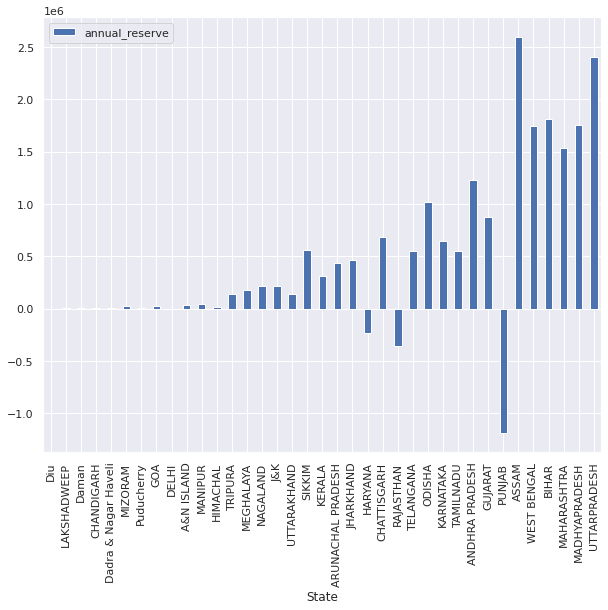

In [103]:
dfnew.plot.bar(x="State", y="annual_reserve", figsize=(10,8))
plt.show()

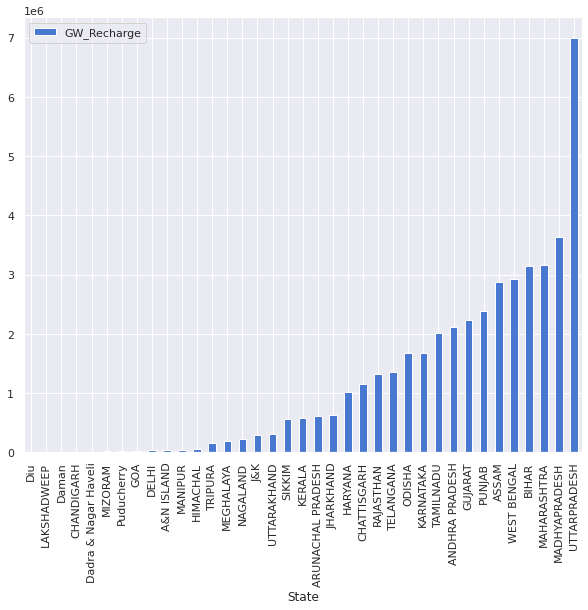

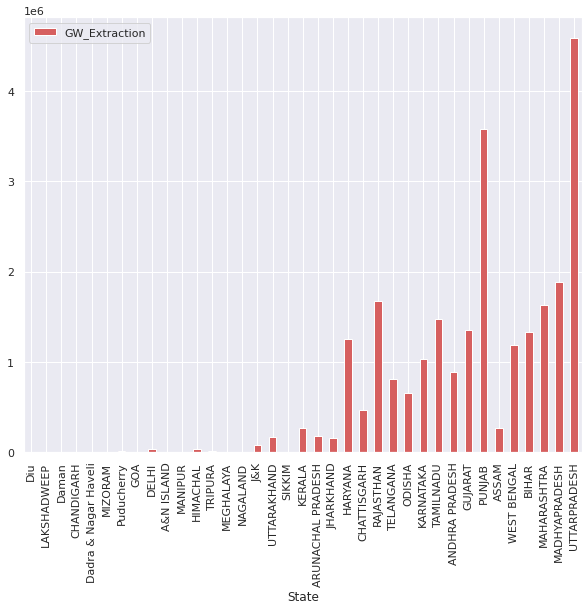

In [93]:



dfnew.plot.bar(x='State', y='GW_Recharge' , color='b',figsize=(10,8))
dfnew.plot.bar(x='State', y= 'GW_Extraction', color='r',figsize=(10,8))

plt.show()

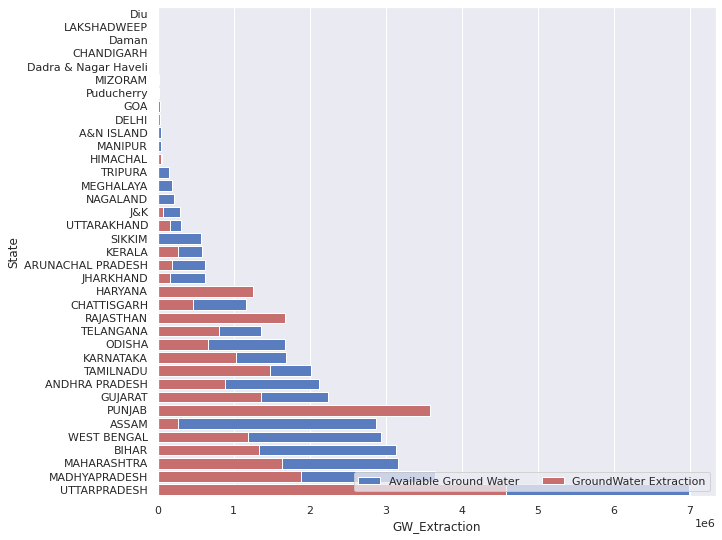

In [106]:
f, ax = plt.subplots(figsize=(10, 9))

sns.set_color_codes("muted")
sns.barplot(x='GW_Recharge', y= 'State', data = dfnew, label = 'Available Ground Water', color='b')
sns.barplot(x='GW_Extraction', y= 'State', data = dfnew, label = 'GroundWater Extraction', color='r')
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

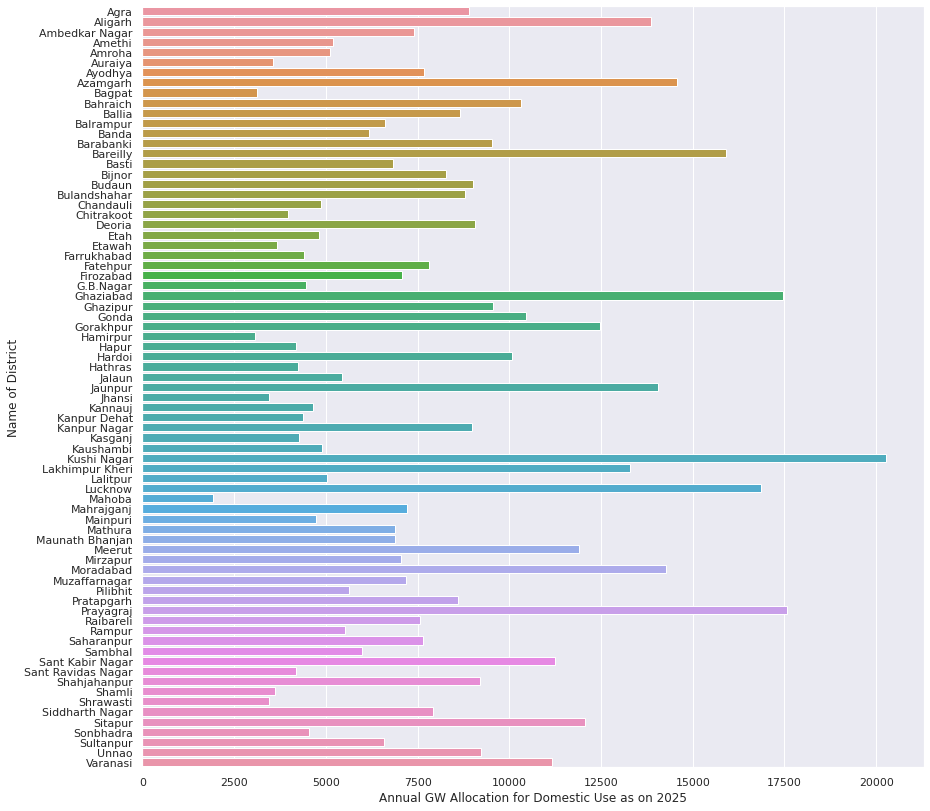

In [100]:
plt.figure(figsize=(14,14))

sns.barplot(x = 'Annual GW Allocation for Domestic Use as on 2025', y = 'Name of District', data = df[df['Name of State']=='UTTARPRADESH'])
plt.show()

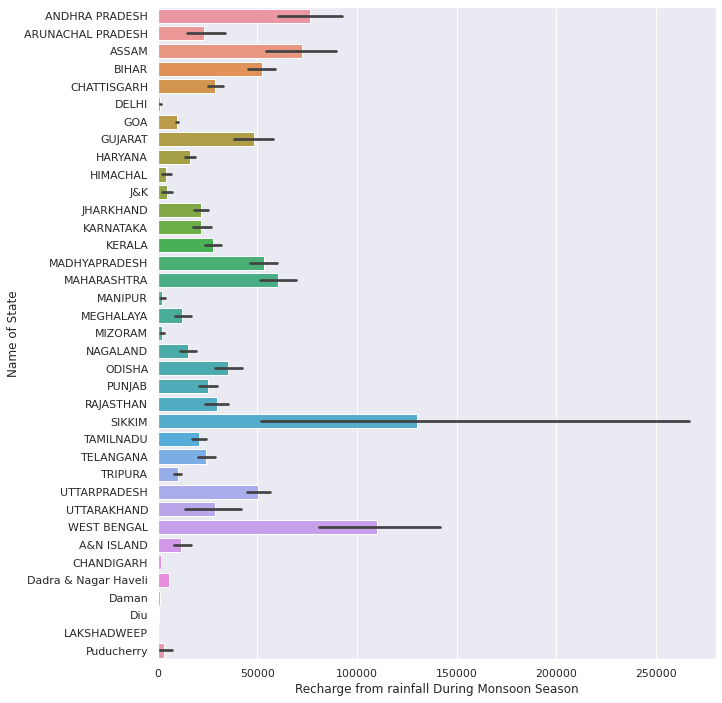

In [101]:
plt.figure(figsize=(10,12))
sns.barplot(x='Recharge from rainfall During Monsoon Season', y='Name of State', data = df)
plt.show()

In [0]:
#https://machinelearningmastery.com/when-to-use-mlp-cnn-and-rnn-neural-networks/

'''WHEN TO USE WHICH NEURAL NETWORK'''


#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

'''groupby pandas'''